In [49]:
import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


# Load time-lapse data...

In [116]:
# filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
# filename = '/Users/jug/Dropbox/ProjectGoldstein/4MyosinMembraneWholeEmbryo.tif'
#filename = '/Users/jug/Repositories/GIT/BobSeg/debug_data/MAX_LP320-06-08_Concat-1-50.tif'
#filename = 'data/MAX_LP320-06-08_Concat-51-100.tif'
filename = 'data/MAX_nmy-2-mK2_mNG-PH-02_Coupled.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,1,:,:]
flowchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (36, 2, 633, 392)
Segchannel shape: (36, 633, 392)
Single image: (633, 392)


In [117]:
max_rs = (segchannel[0].shape[1] / 4,
          segchannel[0].shape[1] / 4)

min_rs = (25,25)
print min_rs, max_rs

(25, 25) (98, 98)


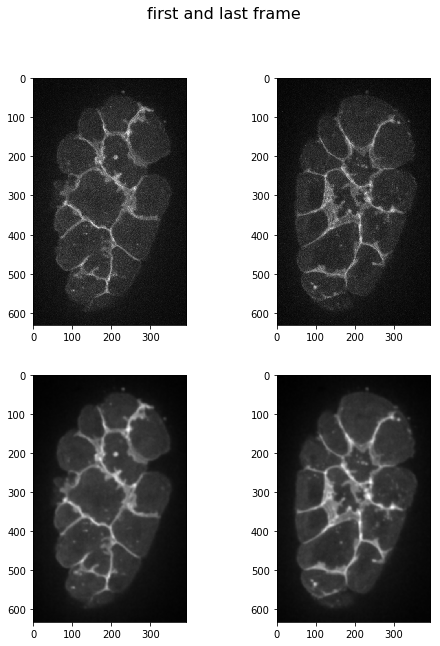

In [118]:
pylab.rcParams['figure.figsize'] = (8, 10)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

# Segmenting a cell

First we create a 'data' object.
We give 3 parameters:
- the channel (images) we want to use for segmenting the cell
- the pixel size in x and y direction (in case the resolution is not isotropic)
- silent: _true_ would mean that no outputs will be printed during segmentation

Then we initialize an _objects_ list (one could add multiple cells to one data object.

In [119]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=100,max_delta_k=4)
objects = []

### Adding the cell to the _data_ object

You can name your cell if you wish. We then add the created _cell_ object to the _objects_ list we created above.

In [120]:
cell = data.init_object("name your cell")
objects.append(cell)

So far we did not say where this cell is located in the image. Hence, we add the object at a specific location, here at frame zero, at location (seed point) x=170, y=250. With _segment it=True_ the object will be segmented right away.

The second line takes the object, the cell, we just seeded at frame 0 and tracks it on all given _target_frames_. We just give a list of all frame ids from 1 to the number of images. The parameter _recenter_iterations_ should usually be at least 1. This is the number of times the segmentation tries to update the given seed point. Values >1 will take more time but might enhance the accuracy of tracking the object.

Added appearance for "name your cell" in frame 0 with seed coordinates [ 170.  250.]
      Optimum energy:  0.061704842304
      Nodes in/out:  1388 5812
      Area:  4794.0
Added appearance for "name your cell" in frame 1 with seed coordinates [ 170.  250.]
      Optimum energy:  0.057731591295
      Nodes in/out:  1263 5937
      Area:  4437.0
    Updated center to [170 247]
Added appearance for "name your cell" in frame 2 with seed coordinates [ 170.  247.]
      Optimum energy:  0.0557728910775
      Nodes in/out:  1158 6042
      Area:  4126.0
    Updated center to [171 244]
Added appearance for "name your cell" in frame 3 with seed coordinates [ 171.  244.]
      Optimum energy:  0.0614738453674
      Nodes in/out:  1079 6121
      Area:  3941.0
    Updated center to [172 240]
Added appearance for "name your cell" in frame 4 with seed coordinates [ 172.  240.]
      Optimum energy:  0.0623363220295
      Nodes in/out:  1002 6198
      Area:  3725.5
    Updated center to [175 237]

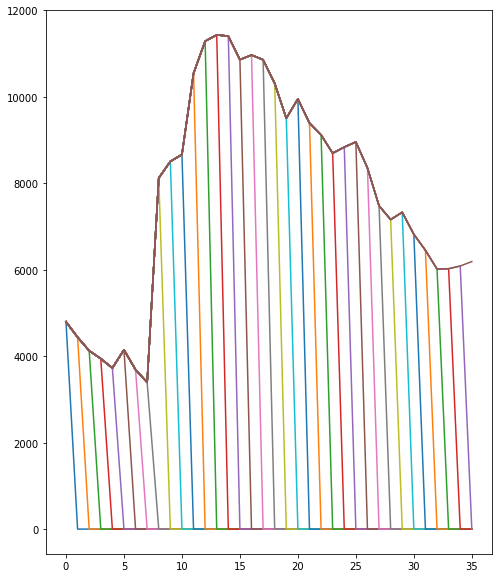

In [121]:
data.add_object_at( cell, min_rs, max_rs, frame=0, seed=(150,300), segment_it=True )
data.track(cell, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

The next command is optional. Without it you will have a segmented cell at every time point you indicated above. **The visualization routine in the next Section will allow you to compare the results of the above and the below segmentation.**

So why another optional line? If you are interested in having a smoothly changing cell outline over time, the line below will do just that. Technically this is achieved by constraining the segmentation to only be allowed to change a certain amount from one time point to the next. (Note: the found solution is still globally optimal given the constraints we put in!)

Results for frame 0:
      Optimum energy:  2.05249414119
      Area:  6864.5
Results for frame 1:
      Optimum energy:  2.05249414119
      Area:  6836.5
Results for frame 2:
      Optimum energy:  2.05249414119
      Area:  6930.5
Results for frame 3:
      Optimum energy:  2.05249414119
      Area:  7117.5
Results for frame 4:
      Optimum energy:  2.05249414119
      Area:  7226.5
Results for frame 5:
      Optimum energy:  2.05249414119
      Area:  7350.0
Results for frame 6:
      Optimum energy:  2.05249414119
      Area:  7554.0
Results for frame 7:
      Optimum energy:  2.05249414119
      Area:  7815.5
Results for frame 8:
      Optimum energy:  2.05249414119
      Area:  8173.0
Results for frame 9:
      Optimum energy:  2.05249414119
      Area:  8469.0
Results for frame 10:
      Optimum energy:  2.05249414119
      Area:  8759.0
Results for frame 11:
      Optimum energy:  2.05249414119
      Area:  9046.5
Results for frame 12:
      Optimum energy:  2.05249414119
   

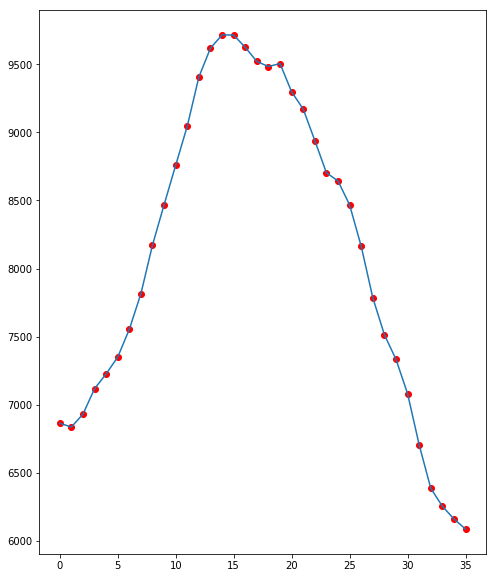

In [122]:
data.segment2dt( cell, max_radial_delta=2 )

# Visualizing the results

The following line creates images that show the outline of the segmented object(s).
**Below we will export these images (they will e.g. be needed for the KymographMaker).**

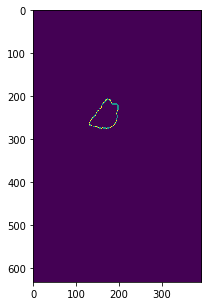

In [111]:
pylab.rcParams['figure.figsize'] = (4, 5)
segimgs = data.create_segmentation_image()
imshow(segimgs[0])

This is just for you visual preasure (and of course to show if everyting worked ok).

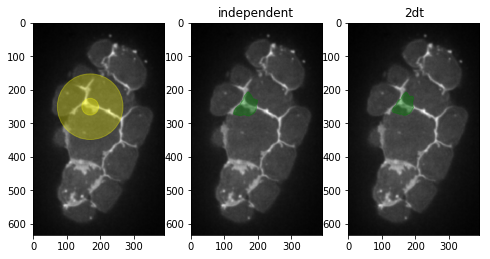

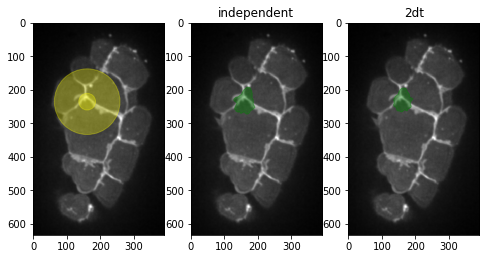

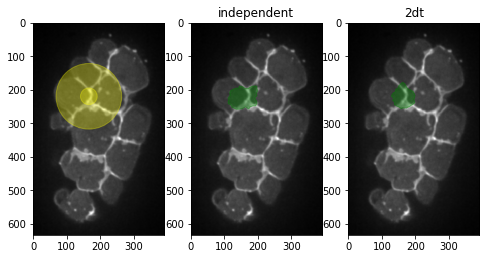

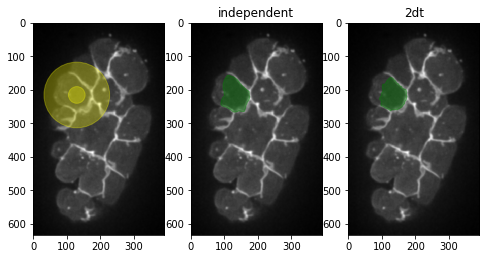

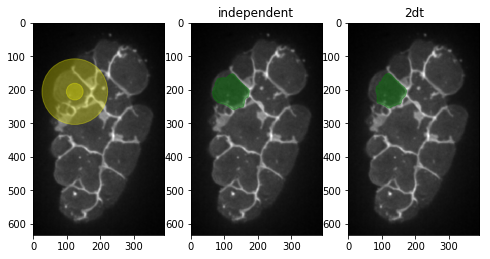

In [112]:
pylab.rcParams['figure.figsize'] = (8, 10)
for frame in range(1,len(data.images),len(data.images)/5):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    ax = plt.subplot(133)
    ax.set_title('2dt')
    data.plot_2dt_result( frame, ax )

# FLOW

### Look at the loaded flow channel images...

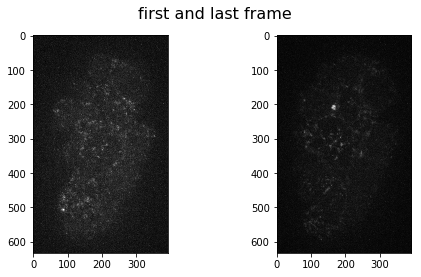

In [113]:
pylab.rcParams['figure.figsize'] = (8, 4)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flowchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[-1], plt.get_cmap('gray'))

Flow computation is also part of the _data_ object we created above. Internally this uses a dense flow procedure implemented in OpenCV. The second cell then renders the image based on the computed flows.

Parameters are:
- the data2d object holding all computation results (including the computed flows)
- the images you want the flow to be computed on
- any second channel that will be used only for the visualization
- a folder into which the visualization frames will be stored
- _inline_: if _False_, a OpenCV window will pop open, otherwise visualizaiton will appear within jupyter (attention: much slower)

In [114]:
data.compute_flow( flowchannel );

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  ...done!


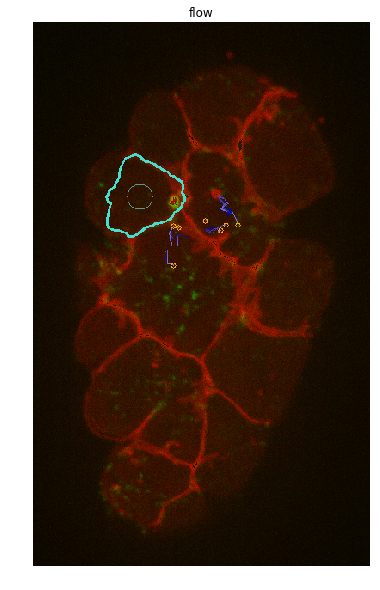

In [115]:
from moviemaker2d import MovieMaker2d
mm = MovieMaker2d( False )
mm.render_flow_movie( data, 
                      segchannel, 
                      flowchannel,
                      #folder='/Users/jug/Repositories/GIT/BobSeg/frames3d_tempconsistent_newFeatureTest/', 
                      folder='/home/hp/git/BobSeg/movies/z_uncoupled/', 
                      inline=True )

## Export Data (e.g. for KymographMaker)

In [28]:
#folder = '/Users/jug/Repositories/GIT/BobSeg/export/'
folder = 'export/'

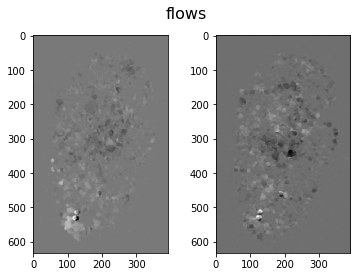

In [29]:
pylab.rcParams['figure.figsize'] = (6, 4)
fig = plt.figure()
fig.suptitle('flows', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(np.array(data.flows[1])[:,:,0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(np.array(data.flows[1])[:,:,1], plt.get_cmap('gray'))

In [28]:
imsave(folder+'flow01.tiff', np.swapaxes(np.swapaxes(data.flows,1,3),2,3))
imsave(folder+'stack01.tiff', stack)
imsave(folder+'seg01.tiff', segimgs)